In [3]:
# 필요한 module import
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

# Data Loading
mnist = input_data.read_data_sets("./data/mnist",one_hot=True) # 변수를 읽어들여서 mnist에 넣어준다
# 폴더 안에 압축파일 4개 만들어질거야
# y축 one hot 처리 해줘야해 <- 원래 우리가 작업해야하는데 예제라 처리 가능

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./data/mnist\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz


In [8]:
train_x_data_df = pd.DataFrame(mnist.train.images)
# 2차원 배열 array -> dataframe으로
train_x_data_df.to_csv("./mnist_x_data.csv",index=False)
# x 데이터의 각 column은(각 픽셀값은) 0과 1사이의 값으로 
# 이미 scale이 되어있는 상태
# 이미지 하나는 3차원 
# 0과 가까울수록 흰색을 지칭, 1과 가까울수록 색상이 어두워져요

train_y_data_df = pd.DataFrame(mnist.train.labels)
train_y_data_df.to_csv("./mnist_y_data.csv",index=False)

In [36]:
# tensorflow로 machine learning
# placeholder
X = tf.placeholder(shape=[None,784], dtype=tf.float32)
Y = tf.placeholder(shape=[None,10], dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([784,10]), name="weight")
b = tf.Variable(tf.random_normal([10]), name="bias")

# Hypothesis
logit = tf.matmul(X,W) + b
H = tf.nn.softmax(logit)

# Cost
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit,
                                                                labels=Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [37]:
# 학습
train_epoch = 30
# 30번 데이터 반복
batch_size = 100
# 55000개를 100개씩 자르겠다
# 550번 학습

# 데이터 사이즈를 보고 epoch을 결정해야해
# 모든 데이터 불러오지 않고, 몇개씩 불러들어서 학습

for step in range(train_epoch):
    num_of_iter = int(mnist.train.num_examples / batch_size)     # train이 도대체 몇개 행이 있는지 / batch_size
    cost_val = 0
    
    for i in range(num_of_iter):
        batch_x, batch_y = mnist.train.next_batch(batch_size)     # 다음 배치 다음배치 뜯어올 수 있는 함수
        _,cost_val = sess.run([train,cost],
                             feed_dict={X:batch_x,
                                        Y:batch_y})
    if step % 3 ==0:
        print("Cost값은: {}".format(cost_val))
# cost값이 기준이 되니 중요해

# 학습이 종료되었으니 정확도를 측정해야 해요
predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype = tf.float32))
print("정확도는 : {}".format(sess.run(accuracy, 
                                  feed_dict={X:mnist.test.images,
                                             Y:mnist.test.labels})))
# 얼마나 학습이 잘 되었는가


Cost값은: 1.2798452377319336
Cost값은: 0.9203716516494751
Cost값은: 0.548814058303833
Cost값은: 0.30980658531188965
Cost값은: 0.5039026141166687
Cost값은: 0.8440707325935364
Cost값은: 0.519089937210083
Cost값은: 0.15716975927352905
Cost값은: 0.38680145144462585
Cost값은: 0.40433555841445923
정확도는 : 0.9020000100135803


Label : [1]
Predict :[1]


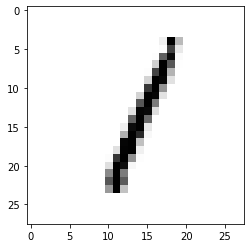

In [227]:
# Prediction
# 랜덤으로 하나의 데이터를 추출해서 그놈을 이용해서 prediction을 한 후 결과를 비교해 보자

r = np.random.randint(0,mnist.test.num_examples) # mnist.test.num_examples = 10000
# 영역을 주면 그 중에서 난수를 하나 뽑아주는 함수
# 난수가 의미하는 행의 label값을 먼저 구해보자
print("Label : {}".format(sess.run(tf.argmax(mnist.test.labels[r:r+1], axis=1))))
# 구간 : 2차원으로 뽑으려고
# 가장 큰 컬럼의 index값을 알아낼 수 잇어
# nodes라서 sess

print("Predict :{}".format(sess.run(tf.argmax(H,1), 
         feed_dict={X:mnist.test.images[r:r+1]})))    # 2차원
# label 값과 예측값이 똑같아야해

plt.imshow(mnist.test.images[r:r+1].reshape(28,28), cmap="Greys")
# 1,784 => 28,28로 바꿀거야